#### 이탈 고객 예측

##### 데이터 전처리(결측치처리, 클래스불균형 확인 및 처리)
##### 특성공학 - 피쳐선정 또는 피쳐생성
##### 베이스 모델 선정
    - 분류모델 : LogisticRegression
    - 클래스 리포트, 과적합 여부
##### 베이스 모델의 성능을 상회 하는 모델과 하이퍼 파라메터 조합을 찿아서 성능을 출력

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/pia222sk20/python/refs/heads/main/data/tellecom.csv'
df = pd.read_csv(url)
print(df.info())
print(df.head())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [70]:
X = df.drop(['customerID', 'Churn'], axis=1)  # 고객 특성
y = df['Churn']               # 고객 이탈여부(예측할 대상)

In [71]:
# 결측치 처리
import numpy as np
df['TotalCharges'] = pd.to_numeric(df.TotalCharges, errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)
print( np.unique(df['TotalCharges']) )

[  18.8    18.85   18.9  ... 8670.1  8672.45 8684.8 ]


C:\Users\playdata2\AppData\Local\Temp\ipykernel_2800\1732457309.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [72]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df1 = df.copy(deep = True)
text_data_features = [i for i in list(df.columns) if i not in list(df.describe().columns)]
for i in text_data_features :
    df1[i] = le.fit_transform(df1[i])

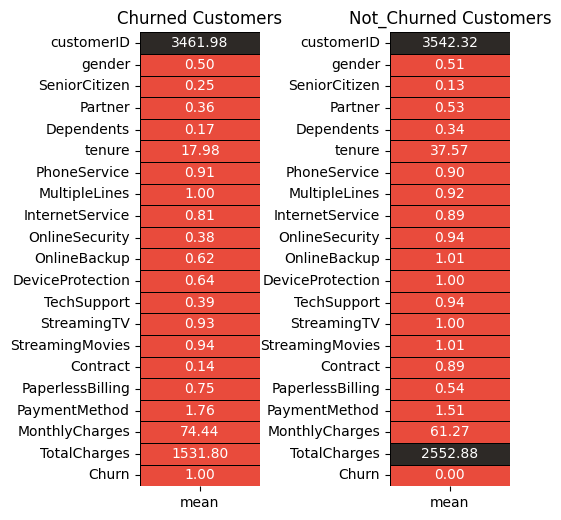

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['#E94B3C','#2D2926']

df1.describe()
churn = df1[df1['Churn'] == 1].describe().T
not_churn = df1[df1['Churn'] == 0].describe().T
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,5))

plt.subplot(1,2,1)
sns.heatmap(churn[['mean']], annot = True,cmap = colors, linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Churned Customers')
plt.subplot(1,2,2)
sns.heatmap(not_churn[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Not_Churned Customers')

fig.tight_layout(pad = 0)

In [74]:
from sklearn.model_selection import train_test_split

X = df1.drop(['customerID', 'Churn'], axis=1)  # 고객 특성
y = df1['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)

# print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.64      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

log_model = LogisticRegression(max_iter=1000, class_weight='balanced')
log_model.fit(X_res, y_res)

y_pred = log_model.predict(X_test)
print(classification_report(y_test, y_pred))

train_pred = log_model.predict(X_train)
test_pred = log_model.predict(X_test)

from sklearn.metrics import accuracy_score

print("Train accuracy:", accuracy_score(y_train, train_pred))
print("Test accuracy:", accuracy_score(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.89      0.77      0.82      1035
           1       0.53      0.72      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409

Train accuracy: 0.7602058927937522
Test accuracy: 0.7558552164655784


c:\Users\playdata2\Desktop\python_src\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
from sklearn.model_selection import GridSearchCV

# 1. 모델 정의
model = LogisticRegression(max_iter=1000)

# 2. 하이퍼파라미터 후보 정의
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # l1/l2 지원 solver
}

# 3. GridSearchCV 정의
grid = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1',       # 분류라면 f1, 회귀면 r2 등
    cv=5,               # 5-fold cross validation
    n_jobs=-1           # 모든 CPU 코어 사용
)

# 4. 학습
grid.fit(X_train, y_train)

# 5. 결과 확인
print("Best parameters:", grid.best_params_)
print("Best f1 score:", grid.best_score_)

# 6. 테스트 데이터 평가
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)


Best parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best f1 score: 0.6035211762851915
